# Práctica: Estadística descriptiva e inferencial

>Este práctica es una adaptación del material desarrollado por el profesor Álex Dávila en el semestre 2019-1. 

Eres un asistente de investigación en el Laboratorio de Psicología de la PUCP. Se te ha asignado analizar los datos de un experimento piloto que consiste en medir los tiempos de reacción frente a un grupo de estímulos de figuras geométricas (triángulo, cuadrado y pentágono), los cuales son mostrados en dos niveles de contraste (opaco y brillante). A continuación se presentan los datos recolectados:

In [9]:
# Cargamos los datos del experimento
import pandas as pd
exp = pd.read_csv('https://raw.githubusercontent.com/renatoparedes/EstadisticaYPsicologiaMatematica/main/RepasodeEstadistica/ExpA.csv')
exp.drop(columns=['Participante'],inplace=True)
exp.head()

,TrianguloBrillante,TrianguloOpaco,CuadradoBrillante,CuadradoOpaco,PentagonoBrillante,PentagonoOpaco
0,258,290,242,295,250,310
1,241,283,242,297,259,313
2,260,300,240,297,250,313
3,251,291,244,292,252,308
4,259,291,240,287,270,307


## Ejercicio 1

- Crea una visualización de los datos que permita comparar las diferentes condiciones experimentales. 
>Sugerencia: Utiliza la función `swarmplot()` disponible en el paquete seaborn.

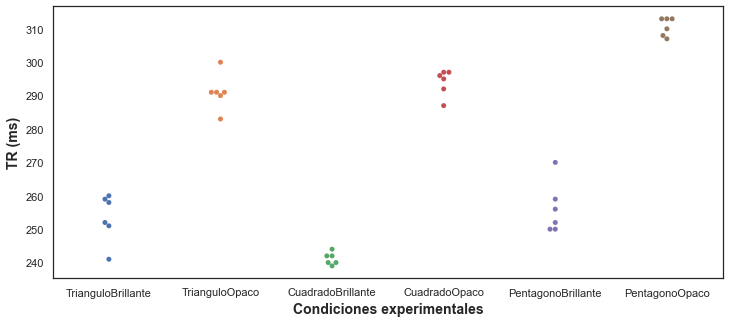

In [10]:
# Cargamos el paquete seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Escribe tu respuesta aquí
sns.set(rc={"figure.figsize":(12, 5)},style='white')
sns.swarmplot(data=exp);
plt.xlabel('Condiciones experimentales',size=14,fontweight='bold');
plt.ylabel('TR (ms)',size=14,fontweight='bold');


- Calcula estadísticos descriptivos de cada una de las condiciones experimentales. Reporta la media, la desviación estándar y el coeficiente de asimetría de cada una.

> Sugerencia: Utiliza el método `.describe()` para obtener un vistazo general de tus datos. Para calcular la asimetría puedes usar la función `skew()` disponible en el paquete `scipy.stats`.

In [11]:
# Escribe tu respuesta aquí
exp.describe()

,TrianguloBrillante,TrianguloOpaco,CuadradoBrillante,CuadradoOpaco,PentagonoBrillante,PentagonoOpaco
count,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,253.50000,291.000000,241.166667,294.000000,256.166667,310.666667
std,7.17635,5.403702,1.834848,3.898718,7.652886,2.732520
min,241.00000,283.000000,239.000000,287.000000,250.000000,307.000000
25%,251.25000,290.250000,240.000000,292.750000,250.500000,308.500000
50%,255.00000,291.000000,241.000000,295.500000,254.000000,311.500000
75%,258.75000,291.000000,242.000000,296.750000,258.250000,313.000000
max,260.00000,300.000000,244.000000,297.000000,270.000000,313.000000


In [12]:
# Cargamos la función skew
from scipy.stats import skew

# Escribe tu respuesta aquí
exp.apply(skew)

TrianguloBrillante   -0.853635
TrianguloOpaco        0.299916
CuadradoBrillante     0.374370
CuadradoOpaco        -1.064750
PentagonoBrillante    1.040471
PentagonoOpaco       -0.326918
dtype: float64

- ¿Qué puedes comentar en relación a tus resultados?

El gráfico muestra que las condiciones experimentales donde se presentan los estímulos opacos suelen tener tiempos de reacción mayores. Las medias y medianas de las condiciones opacas y brillantes apuntan también en esta dirección. Los coeficientes de asimetría calculados sugieren que las condiciones pentágono brillante y cuadrado opaco son poco simétricas (>1). Además, las condiciones triángulo brillante y pentágono brillante presentan una variabilidad mayor al resto de condiciones. 

## Ejercicio 2
Compara las condiciones `TrianguloBrillante` y `TrianguloOpaco` utilizando una prueba t de student para muestras relacionadas. 

> Sugerencia: Utiliza la función `ttest_rel` disponible en el paquete `scipy.stats`.

In [13]:
# Cargamos la función ttest_rel
from scipy.stats import ttest_rel

# Escribe tu respuesta aquí
ttest_rel(exp['TrianguloBrillante'],exp['TrianguloOpaco'])

Ttest_relResult(statistic=-21.017942970271154, pvalue=4.517277215936377e-06)

¿Qué puedes comentar a partir de tus resultados?

De acuerdo a la prueba t de student de medidas repetidas, existiría una diferencia significativa entre las condiciones triángulo brillante y triángulo opaco. Esto sugiere que los tiempos de reacción de los participantes son menores frente a un triángulo brillante en comparación a uno opaco.